In [2]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np
import pandas as pd
import sys

In [3]:
sys.path.insert(0, '/home/llr/cms/wind/cmssw/CMSSW_9_4_2/src/ZZAnalysis/AnalysisStep/test/Python/')

In [4]:
from trainlib.ConfigFileHandler import ConfigFileHandler
from trainlib.ConfigFileUtils import ConfigFileUtils

In [5]:
variable_pretty_names = {
    "D_VBF1j_ggH_ME": r'$\mathcal{D}_{\mathrm{VBF-1j}, ggH}$',
    "D_VBF2j_ggH_ME": r'$\mathcal{D}_{\mathrm{VBF-2j}, ggH}$',
    "D_VBF2j_WHh_ME": r'$\mathcal{D}_{\mathrm{VBF-2j}, WH\mathrm{-hadr}}$',
    "D_VBF2j_ZHh_ME": r'$\mathcal{D}_{\mathrm{VBF-2j}, ZH\mathrm{-hadr}}$',
    "D_WHh_ZHh_ME": r'$\mathcal{D}_{WH\mathrm{-hadr}, ZH\mathrm{-hadr}}$',
    "D_WHh_ggH_ME": r'$\mathcal{D}_{WH\mathrm{-hadr}, ggH}$',
    "D_ZHh_ggH_ME": r'$\mathcal{D}_{ZH\mathrm{-hadr}, ggH}$',
    "D_bkg_ME": r'$\mathcal{D}_{\mathrm{bkg}}$',
    
    "ExtraLepEta[ExtraLepPt|0]": r'$\eta(e\ell_{(1)})$',
    "ExtraLepEta[ExtraLepPt|1]": r'$\eta(e\ell_{(2)})$',
    "ExtraLepEta[ExtraLepPt|2]": r'$\eta(e\ell_{(3)})$',
    "ExtraLepPhi[ExtraLepPt|0]": r'$\phi(e\ell_{(1)})$',
    "ExtraLepPhi[ExtraLepPt|1]": r'$\phi(e\ell_{(2)})$',
    "ExtraLepPt[ExtraLepPt|0]": r'$p_T(e\ell_{(1)})$',
    "ExtraLepPt[ExtraLepPt|1]": r'$p_T(e\ell_{(2)})$',
    "ExtraLepPt[ExtraLepPt|2]": r'$p_T(e\ell_{(3)})$',

    "JetEta[JetPt|0]": r'$\eta(j_{(1)})$',
    "JetEta[JetPt|1]": r'$\eta(j_{(2)})$',
    "JetEta[JetPt|2]": r'$\eta(j_{(3)})$',
    "JetEta[JetPt|3]": r'$\eta(j_{(4)})$',
    
    "JetPhi[JetPt|0]": r'$\phi(j_{(1)})$',
    "JetPhi[JetPt|1]": r'$\phi(j_{(2)})$',
    "JetPhi[JetPt|2]": r'$\phi(j_{(3)})$',
    "JetPhi[JetPt|3]": r'$\phi(j_{(4)})$',
    
    "JetPt[JetPt|0]": r'$p_T(j_{(1)})$',
    "JetPt[JetPt|1]": r'$p_T(j_{(2)})$',
    "JetPt[JetPt|2]": r'$p_T(j_{(3)})$',
    "JetPt[JetPt|3]": r'$p_T(j_{(4)})$',
    
    "PFMET": "MET",
    
    "Z1Mass": r'$m(Z_1)$',
    "Z2Mass": r'$m(Z_2)$',
    "Z1Pt": r'$p_T(Z_1)$',
    "Z2Pt": r'$p_T(Z_2)$',
    "Z1Flav": r'$\mathfrak{f}(Z_1)$',
    "Z2Flav": r'$\mathfrak{f}(Z_2)$',
    
    "ZZEta": r'$\eta(ZZ)$',
    "ZZMassErr": r'$\sigma(m(ZZ))$',
    "ZZMass_masked": r'$m(ZZ)$',
    "ZZPhi": r'$\phi(ZZ)$',
    "ZZPt": r'$p_T(ZZ)$',
    "costhetastar": r'$\mathrm{cos}(\theta^{*})$',
    "helcosthetaZ1": r'$\mathrm{cos}(\theta_1)$',
    "helcosthetaZ2": r'$\mathrm{cos}(\theta_2)$',
    "helphi": r'$\Phi$',
    "phistarZ1": r'$\Phi_1$',
    
    "nCleanedJetsPt30": r'$n(j)$',
    "nCleanedJetsPt30BTagged_bTagSF": r'$n(j_b)$',
    "nExtraZ": r'$n(eZ)$',
    "nExtraLep": r'$n(e\ell)$',
    "xistar": r'$\xi^{*}$',
    "xi": r'$\xi$'

}

In [6]:
discriminant_pretty_names = {
    "D_VBF_ggH_2j_ML": "D_VBF-2j_ggH_ML",
    "D_VBF_ggH_1j_ML": "D_VBF-1j_ggH_ML",
    "D_VBF_ggH_0j_ML": "D_VBF-0j_ggH_ML"
}

In [7]:
def convert_model_label(raw):
    retval = discriminant_pretty_names.get(raw, raw)
    
    retval = retval.replace('D_', '')
    retval = retval.replace('_ML', '')
    retval = retval.replace('_', ', ')
    
    # get rid of the abbreviated forms
    retval = retval.replace('qq', r'q\bar{q}\rightarrow ZZ')
    retval = retval.replace('ZX', r'Z+X')
    retval = retval.replace('ZHl', r'ZH\mathrm{-lept}')
    retval = retval.replace('ZHh', r'ZH\mathrm{-hadr}')
    retval = retval.replace('WHl', r'WH\mathrm{-lept}')
    retval = retval.replace('WHh', r'WH\mathrm{-hadr}')
    retval = retval.replace('ZX', 'Z+X')
    retval = retval.replace('ttHh', r't\bar{t}H\mathrm{-hadr}')
    retval = retval.replace('ttHl', r't\bar{t}H\mathrm{-lept}')
    retval = retval.replace('ggH', r'ggH')
    retval = retval.replace('ZHMET', r'VH\mathrm{-MET}')
    
    retval = r'$s_{' + retval + r'}$'
    
    # have special ones for the different jet-number components
    if "VBF-2j" in retval:
        retval = r'$s_{\mathrm{VBF}, ggH}\,\,\, [n(j) \geq 2]$'
    elif "VBF-1j" in retval:
        retval = r'$s_{\mathrm{VBF}, ggH}\,\,\, [n(j) = 1]$'
    elif "VBF-0j" in retval:
        retval = r'$s_{\mathrm{VBF}, ggH}\,\,\, [n(j) = 0]$'
    
    return retval

In [8]:
def convert_variable_name(raw):
    return variable_pretty_names.get(raw, raw)

In [18]:
def make_input_plot(input_file):
    confhandler = ConfigFileHandler()
    confhandler.load_configuration(input_file)
    models = confhandler.get_sections()
    
    df = pd.DataFrame()
    
    varcnt = 0
    indivvar = []

    for model in models:
        cur_sect = confhandler.get_section(model)

        used_nonperiodic_vars = filter(None, ConfigFileUtils.parse_list(cur_sect["nonperiodic_columns"], lambda x: x))
        used_periodic_vars = filter(None, ConfigFileUtils.parse_list(cur_sect["periodic_columns"], lambda x: x))

        used_vars = used_nonperiodic_vars + used_periodic_vars
        
        varcnt += len(used_vars)
        indivvar.append(len(used_vars))
        
        var_dict = {col: [1.0] for col in used_vars}
        var_dict["model"] = model

        row_df = pd.DataFrame.from_dict(var_dict)

        df = pd.concat([df, row_df], axis = 0)

    df = df.fillna(0.0)
    
    datacols = [col for col in df.columns if col is not "model"]
    plot_data = df[datacols].as_matrix()
    
    y_label = [convert_variable_name(name) for name in np.array(datacols)]
    x_label = [convert_model_label(label) for label in df["model"].as_matrix()]
    
    fig = plt.figure(figsize = (12, 10))
    
    ax = fig.add_subplot(111)
    
    cax = ax.matshow(plot_data.transpose(), cmap = 'Blues', vmin = 0, vmax = 1)
    ax.set_xticklabels(np.concatenate([[''], x_label]), rotation = 'vertical', fontsize = 11)
    ax.set_yticklabels(np.concatenate([[''], y_label]), fontsize = 10)
    ax.xaxis.set_label_position("top")
    ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
    ax.yaxis.set_major_locator(ticker.MultipleLocator(1))
    
    plt.tight_layout()
    
    print str(varcnt)
    print "min: " + str(min(indivvar))
    print "max: " + str(max(indivvar))
    
    return fig

In [10]:
def make_fscore_plot(input_file):
    df = pd.DataFrame.from_csv(input_file)
    
    cols = [col for col in df["discriminant"]]
    
    df = df.loc[df["discriminant"].isin(cols)]
    
    df = df.fillna(0.0)
        
    # now plot the data contained in the table to have a global picture of the relevant input variables
    datacol_labels = [col for col in df.columns.tolist() if col != "discriminant"]
    variable_data = df[datacol_labels].as_matrix().transpose()
    
    datacol_labels = [convert_variable_name(name) for name in datacol_labels]
    datacol_labels = np.concatenate([[''], np.array(datacol_labels)])
    
    discriminant_labels = [convert_model_label(col) for col in df["discriminant"]]
    discriminant_labels = np.concatenate([[''], discriminant_labels])
    
    fig = plt.figure(figsize = (12, 10))
    ax = fig.add_subplot(111)
    cax = ax.matshow(variable_data, interpolation = 'nearest', cmap = 'Blues', vmin = np.min(variable_data), vmax = np.max(variable_data))
    ax.set_xticklabels(discriminant_labels, rotation = 'vertical')
    ax.set_yticklabels(datacol_labels)
    ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
    ax.yaxis.set_major_locator(ticker.MultipleLocator(1))
    
    plt.tight_layout()
    
    return fig

In [142]:
fig = make_input_plot("/data_CMS/cms/wind/InputConfigurations2.0/combined_99_inputs.conf")

attempting to load configuration file from /data_CMS/cms/wind/InputConfigurations2.0/combined_99_inputs.conf


In [143]:
plt.savefig("/data_CMS/cms/wind/InputConfigurations2.0/combined_99_inputs_selected.pdf")

In [150]:
fig = make_fscore_plot("/data_CMS/cms/wind/InputConfigurations2.0/combined_99_fscore_table.csv")

In [151]:
plt.savefig("/data_CMS/cms/wind/InputConfigurations2.0/combined_99_inputs_fscore.pdf")

In [152]:
fig = make_input_plot("/data_CMS/cms/wind/InputConfigurations2.0/combined_99_nomela_inputs.conf")

attempting to load configuration file from /data_CMS/cms/wind/InputConfigurations2.0/combined_99_nomela_inputs.conf


In [153]:
plt.savefig("/data_CMS/cms/wind/InputConfigurations2.0/combined_99_nomela_inputs_selected.pdf")

In [154]:
fig = make_fscore_plot("/data_CMS/cms/wind/InputConfigurations2.0/combined_99_nomela_fscore_table.csv")

In [155]:
plt.savefig("/data_CMS/cms/wind/InputConfigurations2.0/combined_99_nomela_inputs_fscore.pdf")

these are for the input variable selection using only the two leading jets

In [36]:
fig = make_input_plot("/data_CMS/cms/wind/InputConfigurations2.0_leading_jets/combined_99_inputs.conf")

attempting to load configuration file from /data_CMS/cms/wind/InputConfigurations2.0_leading_jets/combined_99_inputs.conf


In [37]:
plt.savefig("/data_CMS/cms/wind/InputConfigurations2.0_leading_jets/combined_99_inputs_selected.pdf")

In [12]:
fig = make_input_plot("/data_CMS/cms/wind/InputConfigurations2.0_leading_jets/combined_99_all_inputs.conf")

attempting to load configuration file from /data_CMS/cms/wind/InputConfigurations2.0_leading_jets/combined_99_all_inputs.conf


In [13]:
plt.savefig("/data_CMS/cms/wind/InputConfigurations2.0_leading_jets/combined_99_inputs_selected.pdf")

these are for the input variable selection using only the two leading jets and no PFMET for data / MC pairs

In [19]:
fig = make_input_plot("/data_CMS/cms/wind/InputConfigurations2.0_leading_jets/combined_99_inputs_metfix.conf")

attempting to load configuration file from /data_CMS/cms/wind/InputConfigurations2.0_leading_jets/combined_99_inputs_metfix.conf
1387
min: 10
max: 31


In [11]:
plt.savefig("/data_CMS/cms/wind/InputConfigurations2.0_leading_jets/combined_99_inputs_selected_metfix.pdf")

In [15]:
fig = make_input_plot("/data_CMS/cms/wind/InputConfigurations2.0_leading_jets/combined_99_all_inputs_metfix.conf")

attempting to load configuration file from /data_CMS/cms/wind/InputConfigurations2.0_leading_jets/combined_99_all_inputs_metfix.conf
[u'D_VBF2j_ZHh_ME', u'D_VBF2j_WHh_ME', u'D_VBF2j_ggH_ME', u'D_WHh_ggH_ME', u'D_bkg_ME', u'D_ZHh_ggH_ME', u'D_WHh_ZHh_ME', u'D_VBF1j_ggH_ME', u'JetPt[JetPt|0]', u'JetPt[JetPt|1]', u'JetEta[JetPt|0]', u'JetEta[JetPt|1]', u'ExtraLepPt[ExtraLepPt|0]', u'ExtraLepPt[ExtraLepPt|1]', u'ExtraLepEta[ExtraLepPt|0]', u'ExtraLepEta[ExtraLepPt|1]', u'Z1Mass', u'Z2Mass', u'Z1Pt', u'Z2Pt', u'ZZMass_masked', u'ZZMassErr', u'ZZPt', u'ZZEta', u'Z1Flav', u'Z2Flav', u'costhetastar', u'helcosthetaZ1', u'helcosthetaZ2', u'nCleanedJetsPt30', u'nCleanedJetsPt30BTagged_bTagSF', u'nExtraLep', u'JetPhi[JetPt|0]', u'JetPhi[JetPt|1]', u'ExtraLepPhi[ExtraLepPt|0]', u'ExtraLepPhi[ExtraLepPt|1]', u'ZZPhi', u'xi', u'xistar', u'helphi', u'phistarZ1']
[u'D_VBF2j_ZHh_ME', u'D_VBF2j_WHh_ME', u'D_VBF2j_ggH_ME', u'D_WHh_ggH_ME', u'D_bkg_ME', u'D_ZHh_ggH_ME', u'D_WHh_ZHh_ME', u'D_VBF1j_ggH_ME', 

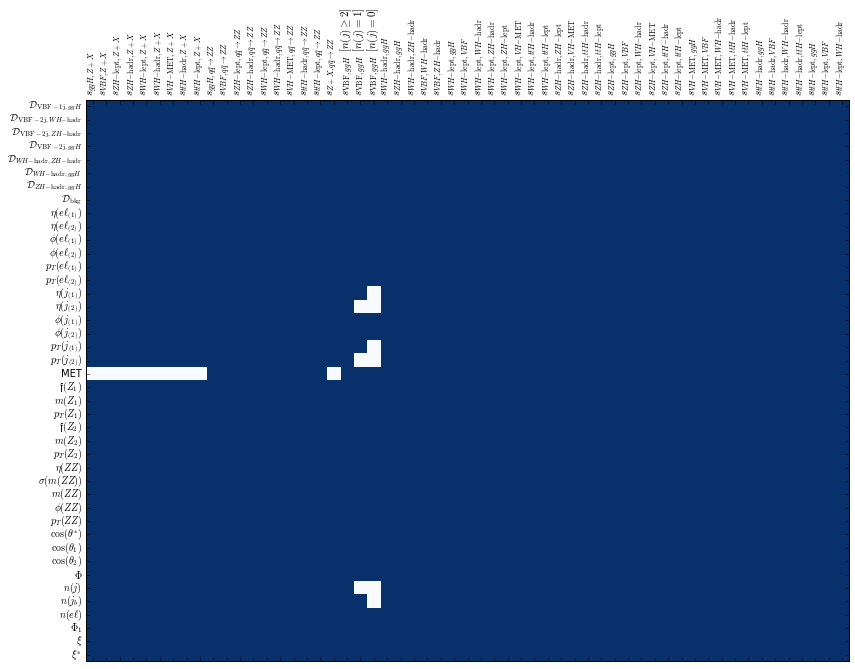

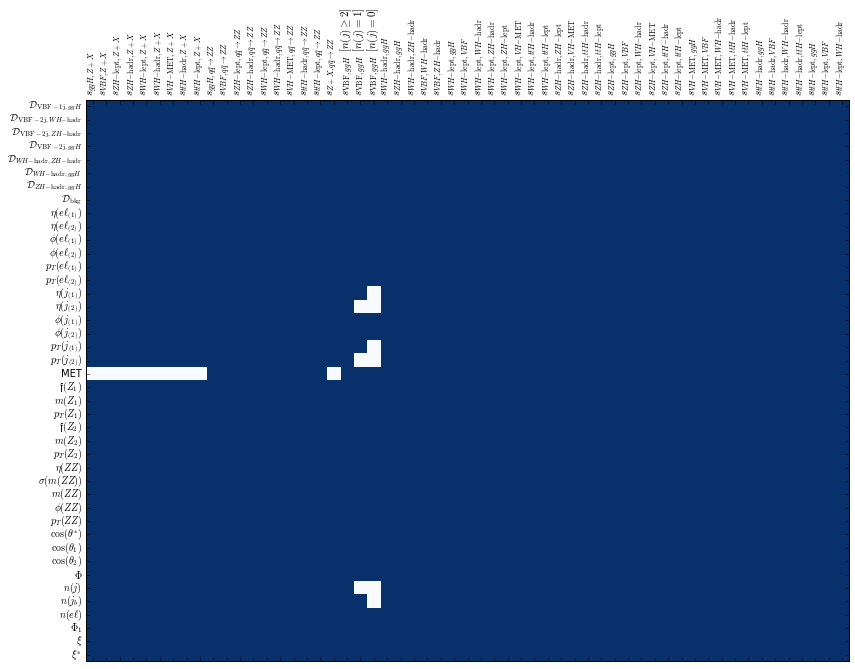

KeyboardInterrupt: 

In [16]:
plt.show()

In [35]:
plt.savefig("/data_CMS/cms/wind/InputConfigurations2.0_leading_jets/combined_99_all_inputs_selected_metfix.pdf")

In [12]:
fig = make_fscore_plot("/data_CMS/cms/wind/InputConfigurations2.0_leading_jets/combined_99_all_inputs_metfix.conf")

KeyError: 'discriminant'

In [35]:
plt.savefig("/data_CMS/cms/wind/InputConfigurations2.0_leading_jets/combined_99_all_inputs_selected_metfix_fscore.pdf")

Cumulative selections

In [10]:
fig = make_input_plot("/data_CMS/cms/wind/InputConfigurations2.0_cumulative/cumulative_70_inputs.conf")
plt.savefig("/data_CMS/cms/wind/InputConfigurations2.0_cumulative/cumulative_70_inputs.pdf")

attempting to load configuration file from /data_CMS/cms/wind/InputConfigurations2.0_cumulative/cumulative_70_inputs.conf


In [11]:
fig = make_input_plot("/data_CMS/cms/wind/InputConfigurations2.0_cumulative/cumulative_75_inputs.conf")
plt.savefig("/data_CMS/cms/wind/InputConfigurations2.0_cumulative/cumulative_75_inputs.pdf")

attempting to load configuration file from /data_CMS/cms/wind/InputConfigurations2.0_cumulative/cumulative_75_inputs.conf


In [10]:
fig = make_input_plot("/data_CMS/cms/wind/InputConfigurations2.0_cumulative/cumulative_80_inputs.conf")
plt.savefig("/data_CMS/cms/wind/InputConfigurations2.0_cumulative/cumulative_80_inputs.pdf")

attempting to load configuration file from /data_CMS/cms/wind/InputConfigurations2.0_cumulative/cumulative_80_inputs.conf


In [20]:
fig = make_input_plot("/data_CMS/cms/wind/InputConfigurations2.0_cumulative/cumulative_85_inputs.conf")
plt.savefig("/data_CMS/cms/wind/InputConfigurations2.0_cumulative/cumulative_85_inputs.pdf")

attempting to load configuration file from /data_CMS/cms/wind/InputConfigurations2.0_cumulative/cumulative_85_inputs.conf
1056
min: 8
max: 24


In [10]:
fig = make_input_plot("/data_CMS/cms/wind/InputConfigurations2.0_cumulative/cumulative_90_inputs.conf")
plt.savefig("/data_CMS/cms/wind/InputConfigurations2.0_cumulative/cumulative_90_inputs.pdf")

attempting to load configuration file from /data_CMS/cms/wind/InputConfigurations2.0_cumulative/cumulative_90_inputs.conf


In [11]:
fig = make_input_plot("/data_CMS/cms/wind/InputConfigurations2.0_cumulative/cumulative_95_inputs.conf")
plt.savefig("/data_CMS/cms/wind/InputConfigurations2.0_cumulative/cumulative_95_inputs.pdf")

attempting to load configuration file from /data_CMS/cms/wind/InputConfigurations2.0_cumulative/cumulative_95_inputs.conf


In [12]:
fig = make_input_plot("/data_CMS/cms/wind/InputConfigurations2.0_cumulative/cumulative_99_inputs.conf")
plt.savefig("/data_CMS/cms/wind/InputConfigurations2.0_cumulative/cumulative_99_inputs.pdf")

attempting to load configuration file from /data_CMS/cms/wind/InputConfigurations2.0_cumulative/cumulative_99_inputs.conf


In [10]:
fig = make_input_plot("/data_CMS/cms/wind/InputConfigurations2.0_cumulative/cumulative_97_inputs.conf")
plt.savefig("/data_CMS/cms/wind/InputConfigurations2.0_cumulative/cumulative_97_inputs.pdf")

attempting to load configuration file from /data_CMS/cms/wind/InputConfigurations2.0_cumulative/cumulative_97_inputs.conf


selections without low-level decay variables

In [11]:
fig = make_input_plot("/data_CMS/cms/wind/InputConfigurations2.0_nodecay/cumulative_97_inputs.conf")
plt.savefig("/data_CMS/cms/wind/InputConfigurations2.0_nodecay/cumulative_97_inputs.pdf")

attempting to load configuration file from /data_CMS/cms/wind/InputConfigurations2.0_nodecay/cumulative_97_inputs.conf


In [12]:
fig = make_input_plot("/data_CMS/cms/wind/InputConfigurations2.0_nodecay/cumulative_95_inputs.conf")
plt.savefig("/data_CMS/cms/wind/InputConfigurations2.0_nodecay/cumulative_95_inputs.pdf")

attempting to load configuration file from /data_CMS/cms/wind/InputConfigurations2.0_nodecay/cumulative_95_inputs.conf


In [13]:
fig = make_input_plot("/data_CMS/cms/wind/InputConfigurations2.0_nodecay/cumulative_90_inputs.conf")
plt.savefig("/data_CMS/cms/wind/InputConfigurations2.0_nodecay/cumulative_90_inputs.pdf")

attempting to load configuration file from /data_CMS/cms/wind/InputConfigurations2.0_nodecay/cumulative_90_inputs.conf


In [14]:
fig = make_input_plot("/data_CMS/cms/wind/InputConfigurations2.0_nodecay/cumulative_80_inputs.conf")
plt.savefig("/data_CMS/cms/wind/InputConfigurations2.0_nodecay/cumulative_80_inputs.pdf")

attempting to load configuration file from /data_CMS/cms/wind/InputConfigurations2.0_nodecay/cumulative_80_inputs.conf
